In [2]:
# Importing Modules 
# Importing Modules 
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(483)

### Observation
1. The dataset has Null Values in column Raiting,Type,Content Rating,Current Ver, Android Ver
2. The Dataset also contain Duplicate Values
3. In the Datasets Colums are of Numeric Type and Categorical Type 

#### 1. Handling Null Values 
1. Raiting


In [8]:
# save the original data 
dff = df.copy()

In [9]:
dff['Rating'].isnull().sum()

dff['Rating'] = dff['Rating'].fillna(dff['Rating'].mean())
dff['Rating'].isnull().sum()

np.int64(0)

2. Type

In [10]:
dff['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [11]:
dff['Type'] = dff['Type'].map({'Free':'Free', 'Paid':'Paid', np.nan:'Free', 0:'Free'})

In [12]:
dff['Type'].isnull().sum()


np.int64(1)

3. Content Rating

In [13]:
dff['Content Rating'].unique()
dff['Content Rating'].mode()

0    Everyone
Name: Content Rating, dtype: object

In [14]:
dff['Content Rating'] = dff['Content Rating'].map({'Everyone': 'Everyone', 'Teen':'Teen', 'Everyone 10+':'Everyone', 'Mature 17+':'Mature',
       'Adults only 18+': 'Adults', 'Unrated':'Everyone',np.nan:'Everyone'})

In [15]:
dff['Content Rating'].isnull().sum()

np.int64(0)

4. Current Ver and Android Ver

In [16]:
dff[dff['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.193338,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.193338,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.193338,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.193338,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [17]:
dff = dff.drop([15,1553,6322,6803,7333,7407,7730,10342])

In [18]:
dff['Current Ver'].isnull().sum()

np.int64(0)

In [19]:
dff['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [20]:
dff['Android_ver']=dff['Android Ver'].str.split(' ').str[0]

In [21]:
dff.drop('Android Ver',axis=1, inplace=True)
dff.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4


In [22]:
dff['Android_ver']=dff['Android_ver'].fillna(dff['Android_ver'].mode)

In [23]:
dff.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android_ver       0
dtype: int64

### All The Null Values are Handled

### Now Duplicate Value 

In [24]:
dff.duplicated().sum()

np.int64(483)

In [25]:
dff.drop_duplicates(inplace=True)

In [26]:
dff.duplicated().sum()

np.int64(0)

In [27]:
dff.shape

(10350, 13)

In [28]:
dff.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4


### Now Check for the Cloumns That only have Numeric data 

In [29]:
# numeric_features = [feature for feature in dff.columns if dff[feature].dtype != 'O']
# categorical_features = [feature for feature in dff.columns if dff[feature].dtype == 'O']

# # print columns
# print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
# print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

#### Removing symboles form columns

1. Category


In [30]:
dff['Rating']=dff['Rating'].astype(int)

In [31]:
dff.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4


2. Reviews

In [32]:
dff[~dff['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,NaN,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,<bound method Series.mode of 0 4.0.3\n...


In [33]:
dff = dff.drop(10472)


3. Size

In [34]:
dff['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [35]:
dff['Size']=dff['Size'].str.replace('M','000000')
dff['Size']=dff['Size'].str.replace('k', '000')
dff['Size']=dff['Size'].replace('Varies with device',np.nan)
dff['Size']=dff['Size'].replace(np.nan,'11000000')



In [36]:
dff['Size'].isnull().sum()

np.int64(0)

4. Install and Price 

In [37]:
dff['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [38]:
dff['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [39]:
char_to_rem = ['+','$',',']
cols_to_work = ['Installs','Price']

for items in char_to_rem:
    for cols in cols_to_work:
        dff[cols]=dff[cols].str.replace(items, '')

In [40]:
dff['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [41]:
dff['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [42]:
dff.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8.7000000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8000000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4


In [43]:
dff['Last Updated']= pd.to_datetime(dff['Last Updated'])
dff['Day'] = dff['Last Updated'].dt.day
dff['Month'] = dff['Last Updated'].dt.month
dff['Year'] = dff['Last Updated'].dt.year

# dff.drop('Last Updated',inplace=True,axis=1)

In [44]:
dff.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8.7000000,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000000,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8000000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


In [45]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10349 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10349 non-null  object        
 1   Category        10349 non-null  object        
 2   Rating          10349 non-null  int64         
 3   Reviews         10349 non-null  object        
 4   Size            10349 non-null  object        
 5   Installs        10349 non-null  object        
 6   Type            10349 non-null  object        
 7   Price           10349 non-null  object        
 8   Content Rating  10349 non-null  object        
 9   Genres          10349 non-null  object        
 10  Last Updated    10349 non-null  datetime64[ns]
 11  Current Ver     10349 non-null  object        
 12  Android_ver     10349 non-null  object        
 13  Day             10349 non-null  int32         
 14  Month           10349 non-null  int32         
 15  Year   

In [46]:
dff['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      shape=(2831,), dtype=object)

In [47]:
dff['Current Ver']=dff['Current Ver'].replace('Varies with device', '1')

In [48]:
dff['Android_ver'] = dff['Android_ver'].replace('varies','4.1')
dff['Android_ver'] = dff['Android_ver'].replace('4.4W','4.4')
dff['Android_ver'] = dff['Android_ver'].replace('Varies','4.1')

In [49]:
# dff.to_csv('Clean_PlayStore.csv')

In [50]:
dff.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8.7000000,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000000,50000000,Free,0,Teen,Art & Design,2018-06-08,1,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8000000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


In [51]:
print(dff.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android_ver', 'Day', 'Month', 'Year'],
      dtype='object')


In [52]:
dff['Last Updated'] = np.random.randint(len(dff))

In [53]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10349 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10349 non-null  object
 1   Category        10349 non-null  object
 2   Rating          10349 non-null  int64 
 3   Reviews         10349 non-null  object
 4   Size            10349 non-null  object
 5   Installs        10349 non-null  object
 6   Type            10349 non-null  object
 7   Price           10349 non-null  object
 8   Content Rating  10349 non-null  object
 9   Genres          10349 non-null  object
 10  Last Updated    10349 non-null  int64 
 11  Current Ver     10349 non-null  object
 12  Android_ver     10349 non-null  object
 13  Day             10349 non-null  int32 
 14  Month           10349 non-null  int32 
 15  Year            10349 non-null  int32 
dtypes: int32(3), int64(2), object(11)
memory usage: 1.2+ MB


In [54]:
dff.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000,10000,Free,0,Everyone,Art & Design,3892,1.0.0,4.0.3,7,1,2018


In [55]:
dff['Rating'] = dff['Rating'].astype(int)
dff['Reviews'] = dff['Reviews'].astype(int)
dff['Size'] = dff['Size'].astype(float)
dff['Installs'] = dff['Installs'].astype(int)
dff['Price']=dff['Price'].astype(float)
dff['Rating'] = dff['Rating'].astype(int)

In [56]:
numeric_features = [features for features in dff.columns if dff[features].dtype!='O']
categorical_features = [feature for feature in dff.columns if dff[feature].dtype =='O']

print(numeric_features,categorical_features)


['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year'] ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android_ver']


In [57]:
for cols in categorical_features:
    print(dff[cols].value_counts(normalize=True)*100)
    print('---------------------------------')

App
ROBLOX                                            0.086965
8 Ball Pool                                       0.067639
Helix Jump                                        0.057977
Zombie Catchers                                   0.057977
Bubble Shooter                                    0.057977
                                                    ...   
Fr. Daoud Lamei                                   0.009663
Poop FR                                           0.009663
PLMGSS FR                                         0.009663
List iptv FR                                      0.009663
Photo Editor & Candy Camera & Grid & ScrapBook    0.009663
Name: proportion, Length: 9651, dtype: float64
---------------------------------
Category
FAMILY                 18.745773
GAME                   10.831964
TOOLS                   8.126389
BUSINESS                4.126003
MEDICAL                 3.942410
PRODUCTIVITY            3.932747
PERSONALIZATION         3.749155
LIFESTYLE               3.

In [58]:
import matplotlib.pyplot as plt

C:\Users\behli\AppData\Local\Temp\ipykernel_20988\1992767008.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dff[numeric_features[i]],shade=True, color='r')
C:\Users\behli\AppData\Local\Temp\ipykernel_20988\1992767008.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dff[numeric_features[i]],shade=True, color='r')
C:\Users\behli\AppData\Local\Temp\ipykernel_20988\1992767008.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dff[numeric_features[i]],shade=True, color='r')
C:\Users\behli\AppData\Local\Temp\ipykernel_20988\1992767008.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `

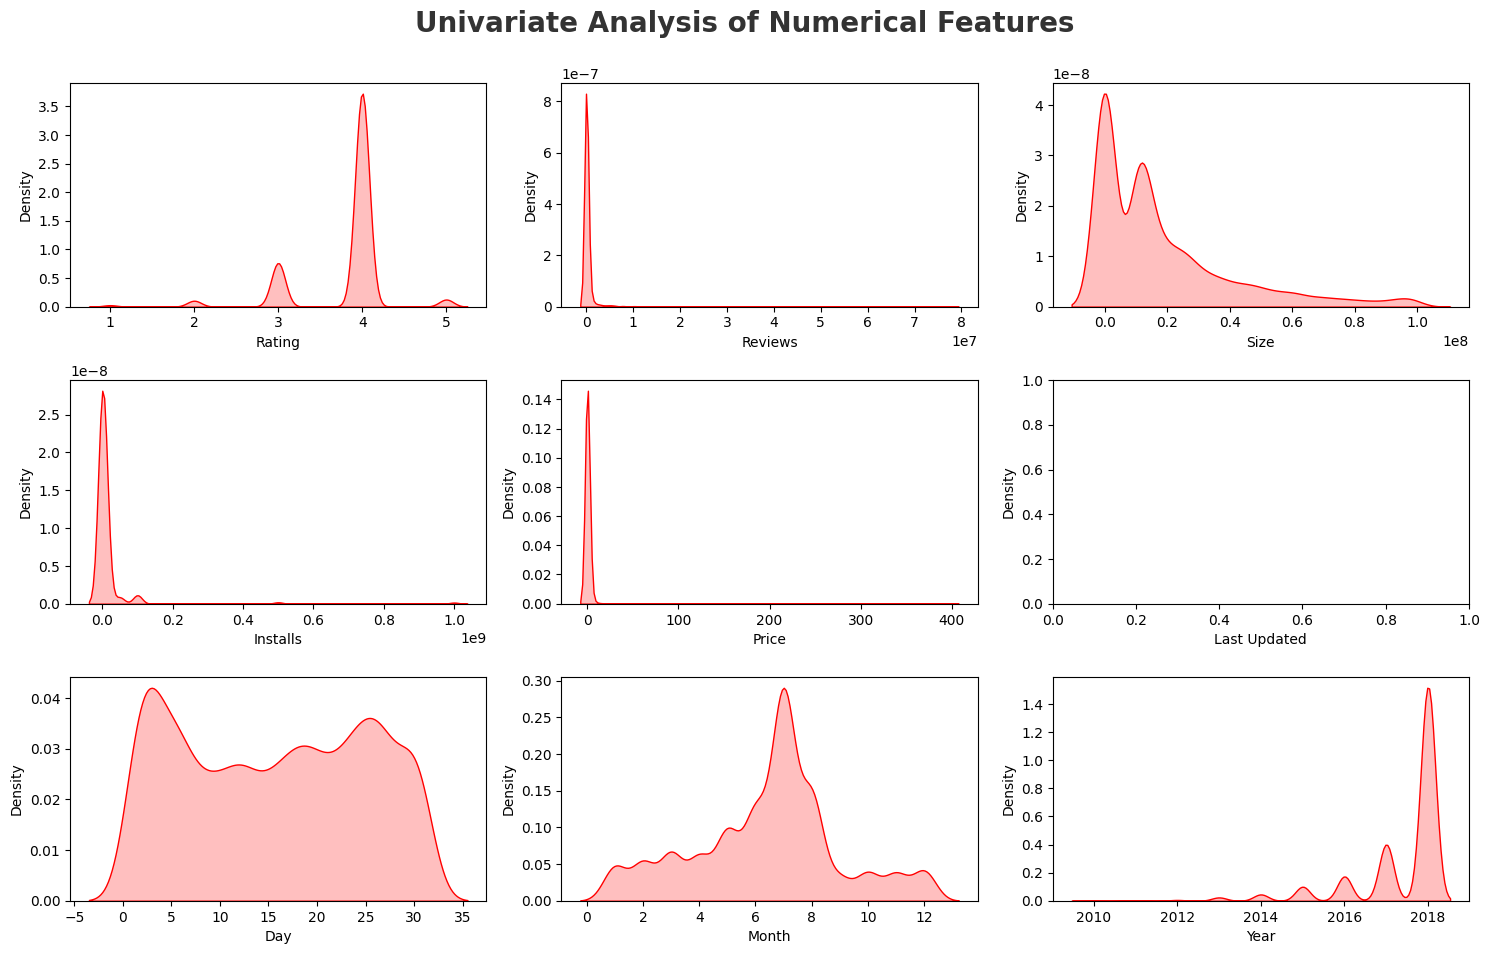

In [59]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=dff[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

C:\Users\behli\AppData\Local\Temp\ipykernel_20988\1812005187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette="Set2")
C:\Users\behli\AppData\Local\Temp\ipykernel_20988\1812005187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[category[i]],palette="Set2")


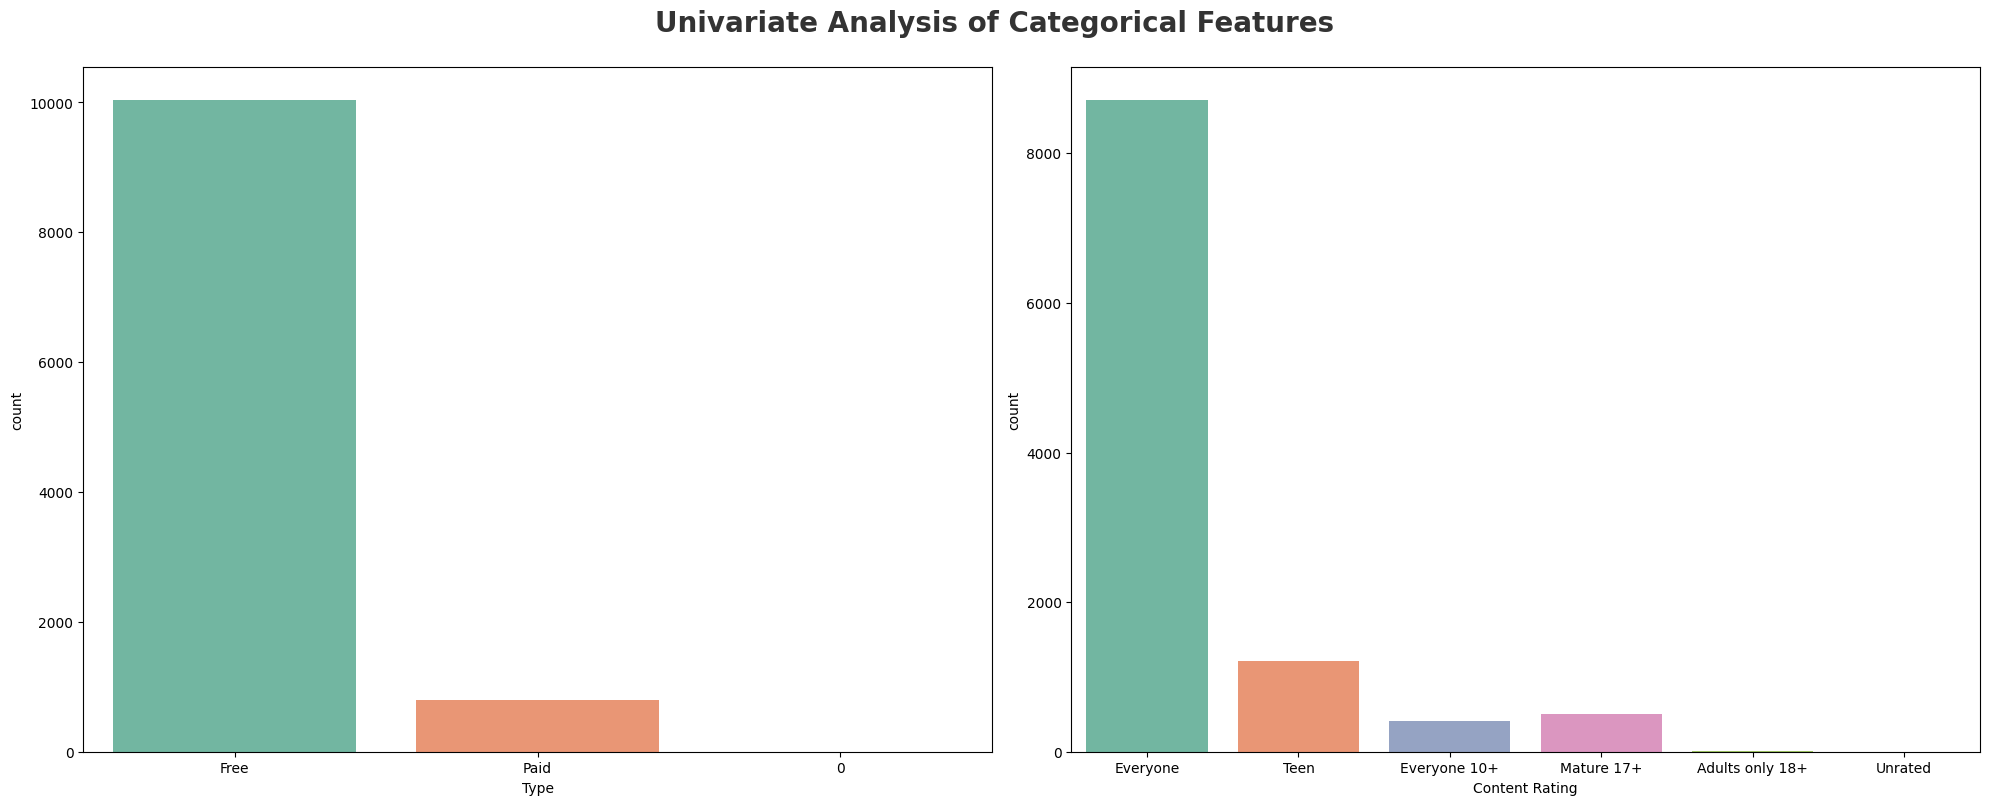

In [60]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.tight_layout() 

In [61]:
dff.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,3892,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,3892,2.0.0,4.0.3,15,1,2018


<Axes: ylabel='count'>

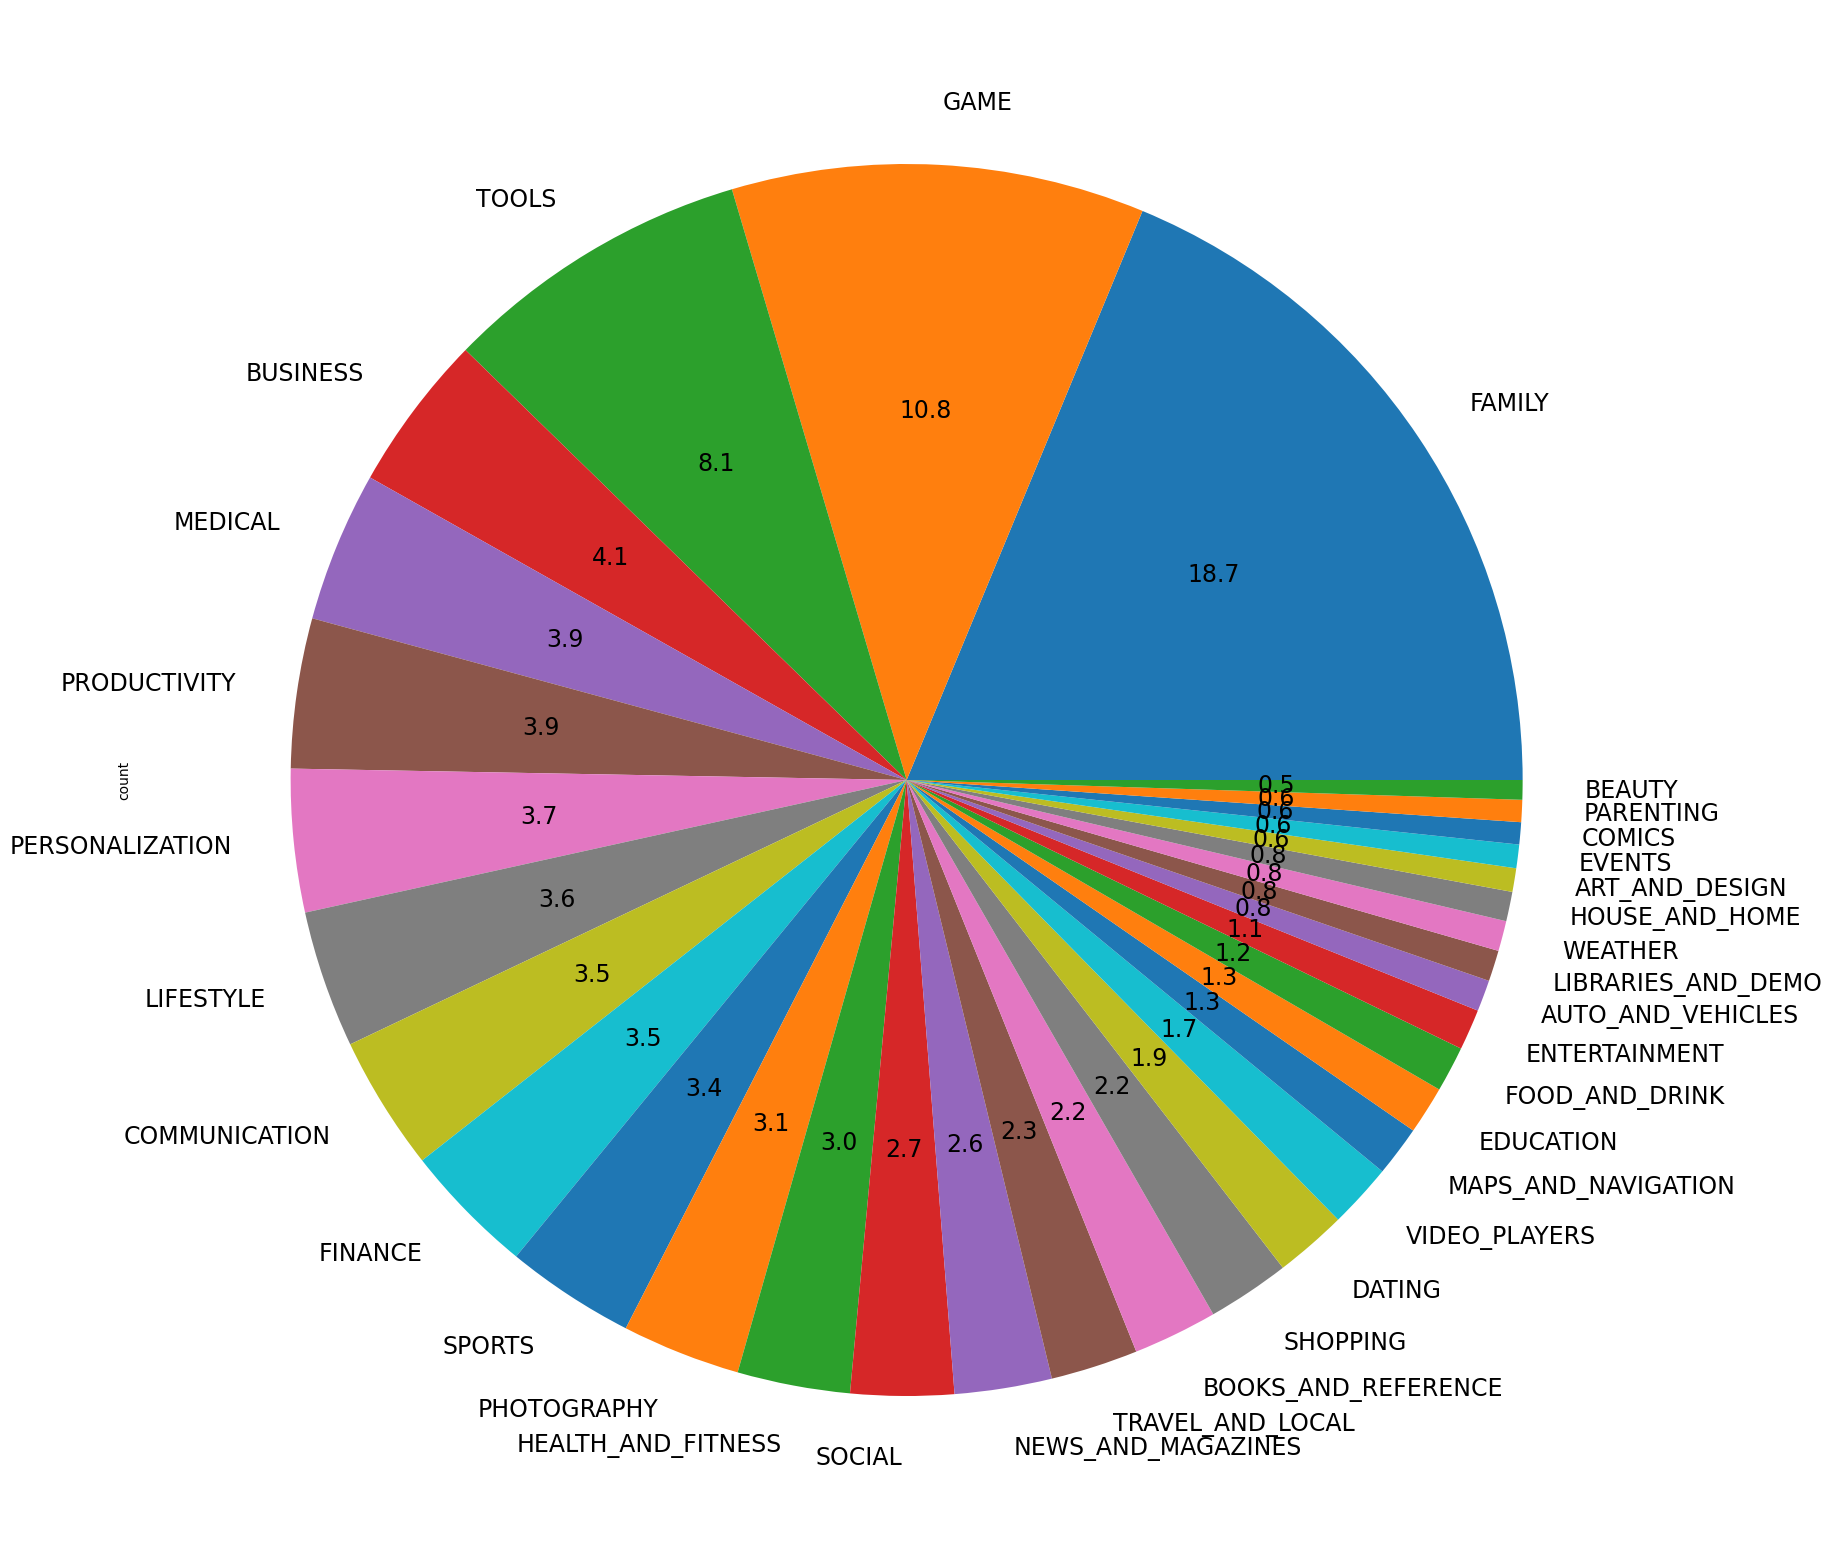

In [62]:
dff['Category'].value_counts().plot.pie(y=dff['Category'],fontsize=17,figsize=(20,20),autopct='%1.1f')

In [63]:
category = pd.DataFrame(dff['Category'].value_counts())
category.rename(columns = {'Category':'Count'},inplace=True)


In [64]:
category

,count
Category,
FAMILY,1940
GAME,1121
TOOLS,841
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366


C:\Users\behli\AppData\Local\Temp\ipykernel_20988\817972050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category.index[:10],y='count',data=category[:10],palette='hls')


<Axes: xlabel='Category', ylabel='count'>

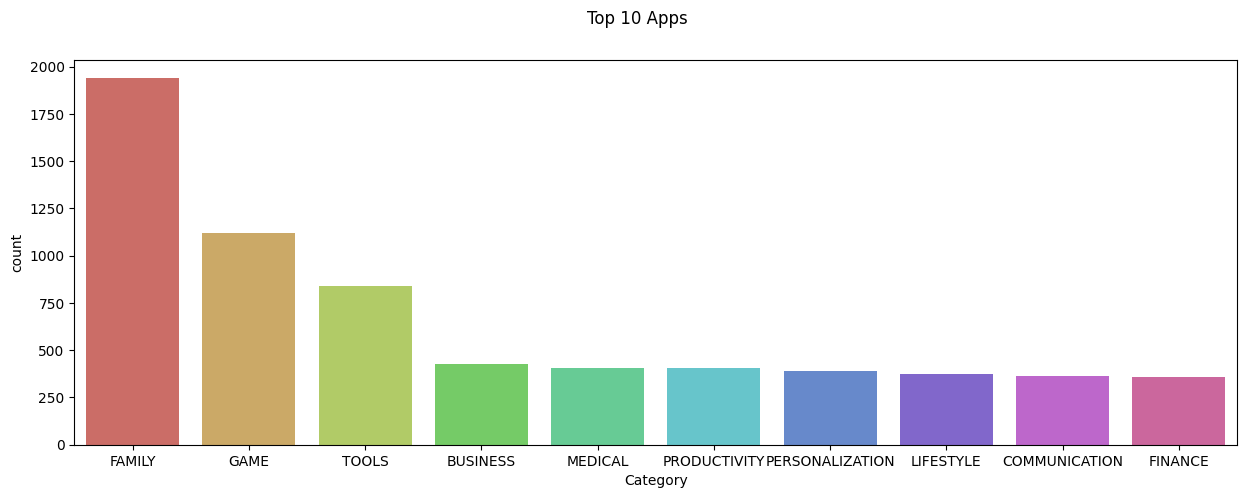

In [65]:
plt.figure(figsize=(15,5))
plt.suptitle('Top 10 Apps')
sns.barplot(x=category.index[:10],y='count',data=category[:10],palette='hls')

In [66]:
dff.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,3892,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,3892,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,3892,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,3892,1,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,3892,1.1,4.4,20,6,2018


<Axes: xlabel='Category', ylabel='Installs'>

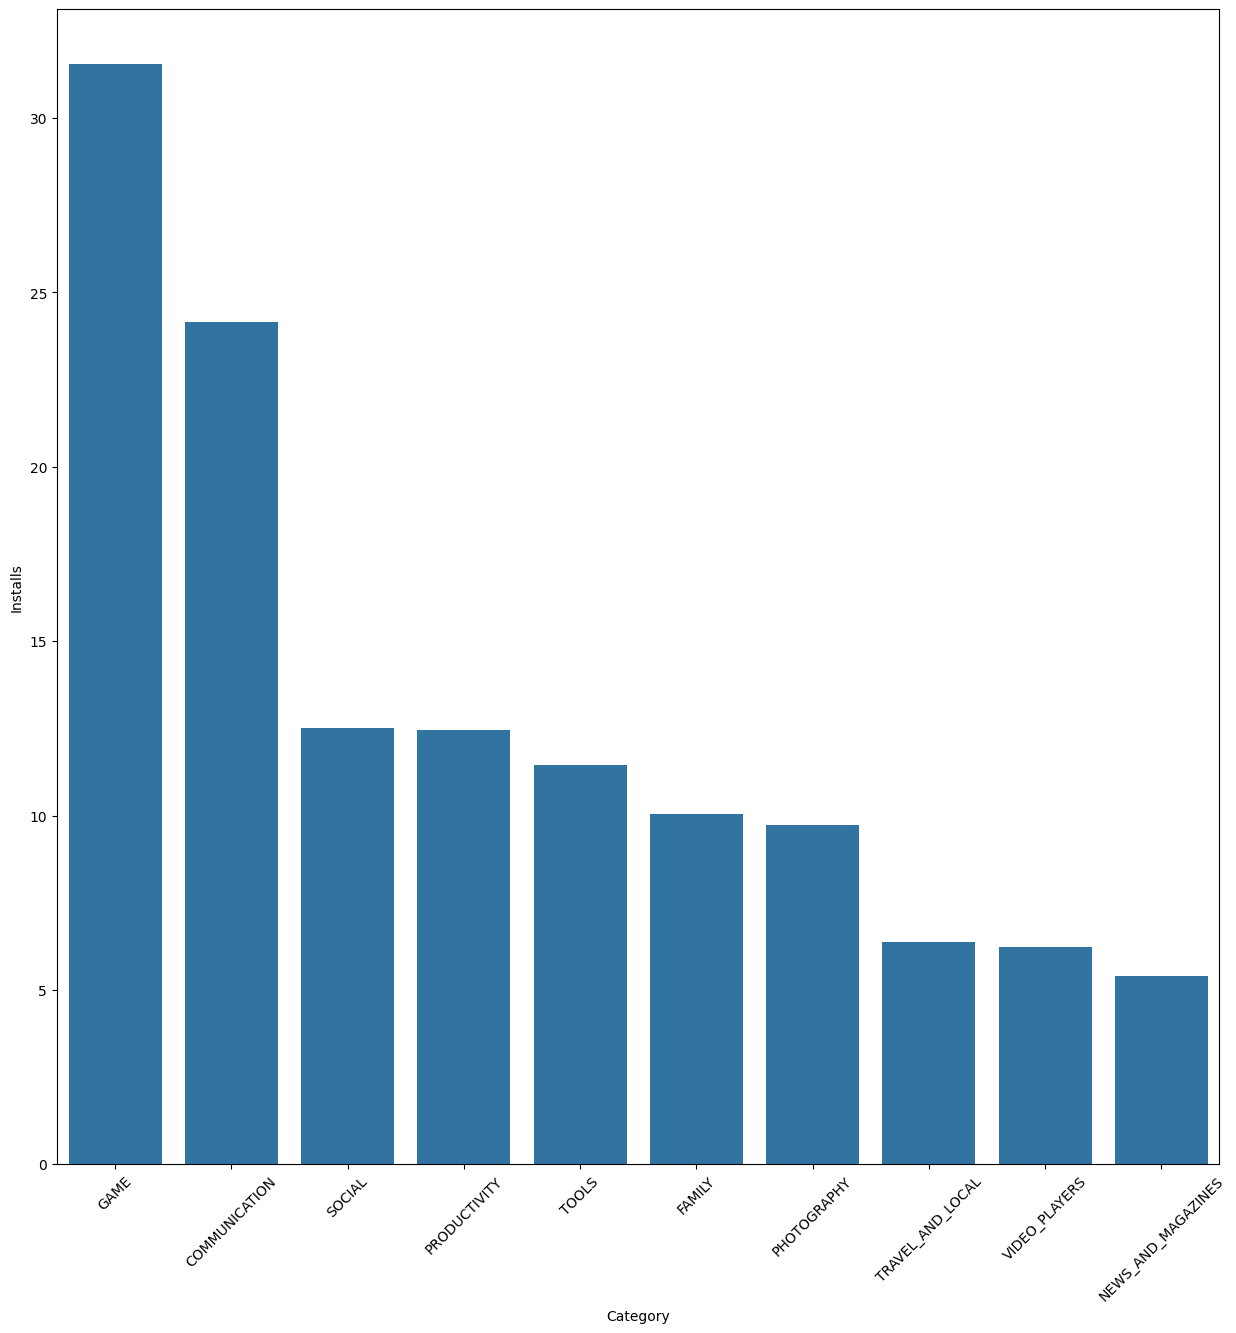

In [67]:
df_cat_install = dff.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
df_cat_install.Installs = df_cat_install.Installs/1000000000# converting into billions

df2= df_cat_install.head(10)
plt.figure(figsize=(15,15))
plt.xticks(rotation=45)
sns.barplot(x= 'Category',y='Installs',data=df2)

In [68]:
#3. How many apps are there on Google Play Store which get 5 ratings??

dff.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,3892,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,3892,2.0.0,4.0.3,15,1,2018


In [79]:
rating = dff.groupby(['App','Category','Installs'])['Rating'].sum().sort_values(ascending=True).reset_index()

torating = rating[rating.Rating==5]
print(torating.head(10))

                          App            Category  Installs  Rating
9012              CB Register              FAMILY        10       5
9013     CARDIAC CT TECHNIQUE             MEDICAL      1000       5
9014              CA Speakers           LIFESTYLE       100       5
9015                  CB News              FAMILY        50       5
9016          CB VIDEO VISION         PHOTOGRAPHY       100       5
9017  BM Physiotherapy Clinic  HEALTH_AND_FITNESS       100       5
9018           CD CHOICE TUBE              FAMILY       500       5
9019                 CE Smart               TOOLS       100       5
9020                       CF             FINANCE       100       5
9021                  CF Life              FAMILY       100       5
